In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

import csv
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import pickle
from joblib import dump, load

# Data Ingestion

In [2]:
# Read in dataframes
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(f"Shape of test.csv: {test.shape}")
print(f"Shape of train.csv: {train.shape}")
print(train.shape[0]/test.shape[0])

Shape of test.csv: (115064, 4)
Shape of train.csv: (421570, 5)
3.663787109782382


In [3]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:
# Merging the store information into the sets
stores = pd.read_csv("stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Data Analysis and Visualization

In [6]:
print("Types of stores:")
stores['Type'].value_counts()

Types of stores:


A    22
B    17
C     6
Name: Type, dtype: int64

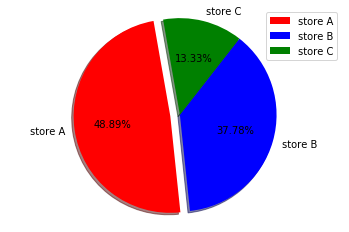

In [7]:
#pie-chart 
labels = 'store A','store B','store C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
colors = ['Red', 'Blue', 'Green']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=100)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.show()

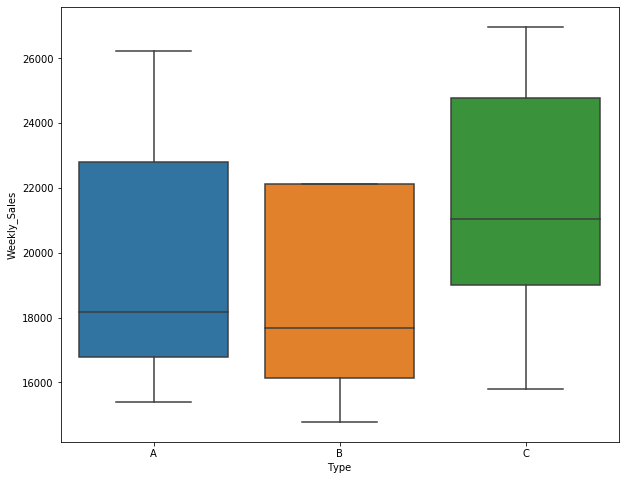

In [8]:
#boxplot for weekly sales for different types of stores :
store_sale = pd.concat([stores['Type'], train['Weekly_Sales']], axis=1)
f, a = plt.subplots(figsize=(10, 8))
fig2 = sb.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

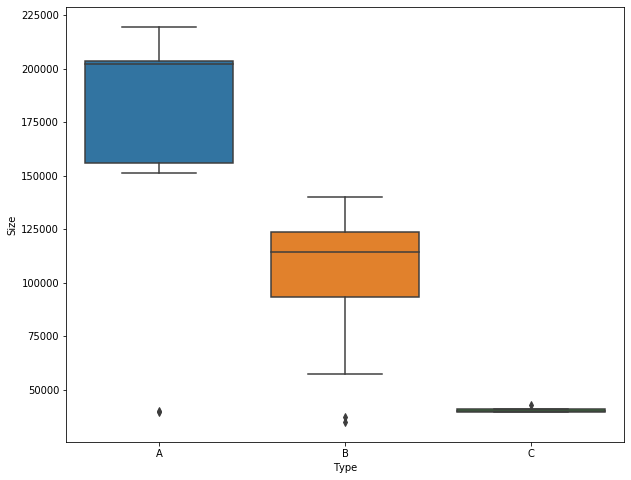

In [9]:
# boxplot
storeType = pd.concat([stores['Type'], stores['Size']], axis=1)
fg, ax = plt.subplots(figsize=(10, 8))
fig = sb.boxplot(x='Type', y='Size', data=storeType)

In [10]:
# total count of sales on holidays and non holidays
print('sales on working days: ',train[train['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holidays: ',train[train['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on working days:  391909
sales on holidays:  29661


In [11]:
features = pd.read_csv("features.csv")
print(f"Shape of features.csv: {features.shape}")
features.head()


Shape of features.csv: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Year'] =train['Date'].dt.year
test['Year'] =test['Date'].dt.year

train['Month'] =train['Date'].dt.month 
test['Month'] =test['Date'].dt.month 

train['Day'] =train['Date'].dt.day 
test['Day'] =test['Date'].dt.day

train['Week'] = train['Date'].dt.week
test['Week'] = test['Date'].dt.week

train['Day_of_week'] =train['Date'].dt.dayofweek
test['Day_of_week'] =test['Date'].dt.dayofweek

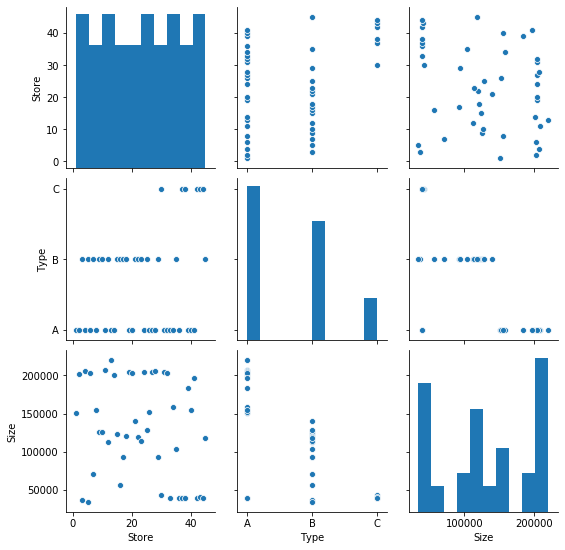

In [13]:
sb.pairplot(stores, vars=['Store','Type','Size'])

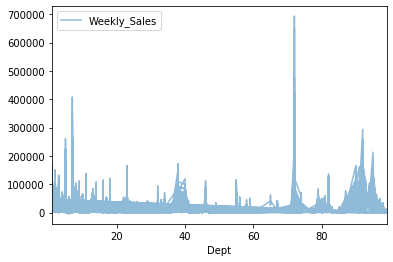

In [14]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1.5,fig=(4,5))

# Observation

Total: 45 stores
Three types of stores: Type A, B and C.
Type A is largest store and Type C is smallest

Sales in holidays is a bit more than sales in non-holidays

# Feature Engineering

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 10 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Year            421570 non-null int64
Month           421570 non-null int64
Day             421570 non-null int64
Week            421570 non-null int64
Day_of_week     421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7)
memory usage: 29.3 MB


In [16]:
features['Date'] = pd.to_datetime(features['Date'])

#merge all the features
train_feats = pd.merge_asof(train, features, on='Store',by='Date')
test_feats = pd.merge_asof(test, features, on='Store',by='Date')

train_feats.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,2010,2,12,6,4,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,2010,2,19,7,4,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,2010,2,26,8,4,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,2010,3,5,9,4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
train_final_feats = pd.merge(train_feats,stores)
test_final_feats = pd.merge(test_feats,stores)

pd.set_option('display.max_columns', None)  
train_final_feats[:1]

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.5,False,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [18]:
#drop one of the two IsHoliday columns and rename it
train_final = train_final_feats.drop(columns=['IsHoliday_y'])
test_final = test_final_feats.drop(columns=['IsHoliday_y'])
train_final = train_final.rename(columns={"IsHoliday_x": "IsHoliday"})
test_final = test_final.rename(columns={"IsHoliday_x": "IsHoliday"})
train_final[:1]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.5,False,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [19]:
#converting bool to int
train_final[['IsHoliday']] = train_final[['IsHoliday']].astype(int)
test_final[['IsHoliday']] = test_final[['IsHoliday']].astype(int)

In [20]:
#converting types to int
def type_to_int(i):
    if i == 'A':
        return 1
    elif i == 'B':
        return 2
    return 3

#train
char_type = train_final['Type']
types = char_type.map(type_to_int)
train_final['Types'] = types

#test
char_type = test_final['Type']
types = char_type.map(type_to_int)
test_final['Types'] = types

In [21]:
train_final=train_final.drop(['Type'], axis=1)
test_final=test_final.drop(['Type'], axis=1)

In [22]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null int64
Year            421570 non-null int64
Month           421570 non-null int64
Day             421570 non-null int64
Week            421570 non-null int64
Day_of_week     421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Size            421570 non-null int64
Types           421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(10)
memory usage

In [23]:
train_final.head(2)   

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Types
0,1,1,2010-02-05,24924.50,0,2010,2,5,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315,1
1,1,1,2010-02-12,46039.49,1,2010,2,12,6,4,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315,1


# Feature Analysis

[]

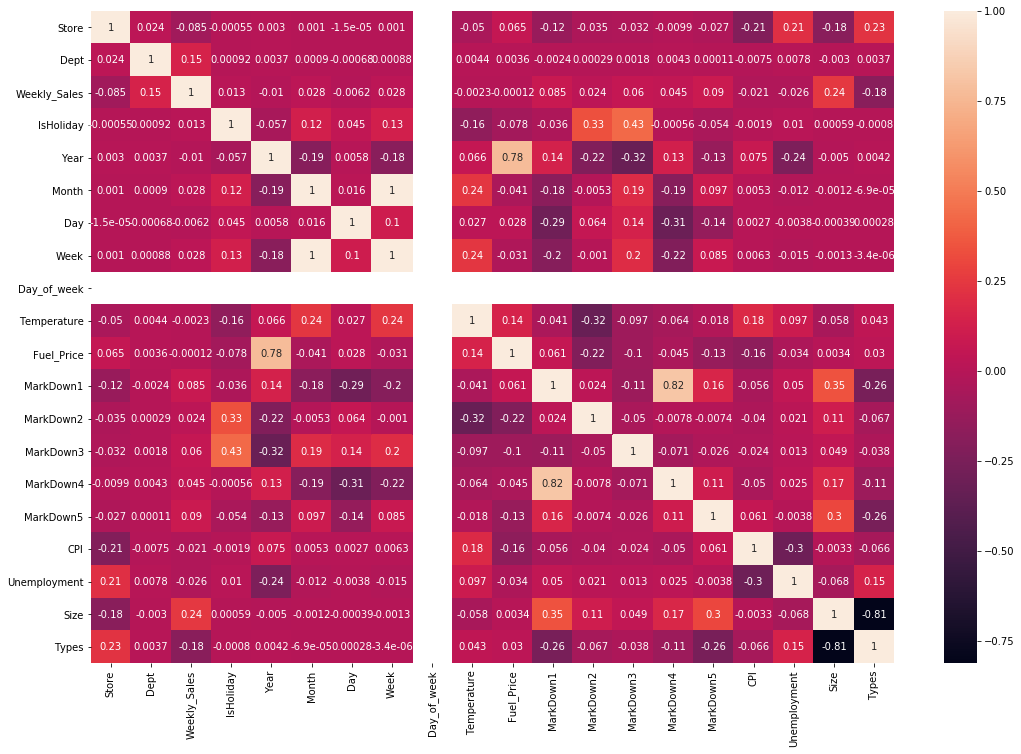

In [24]:
corr = train_final.corr()
plt.figure(figsize=(18, 12))
sb.heatmap(corr, annot=True)
plt.plot()

[]

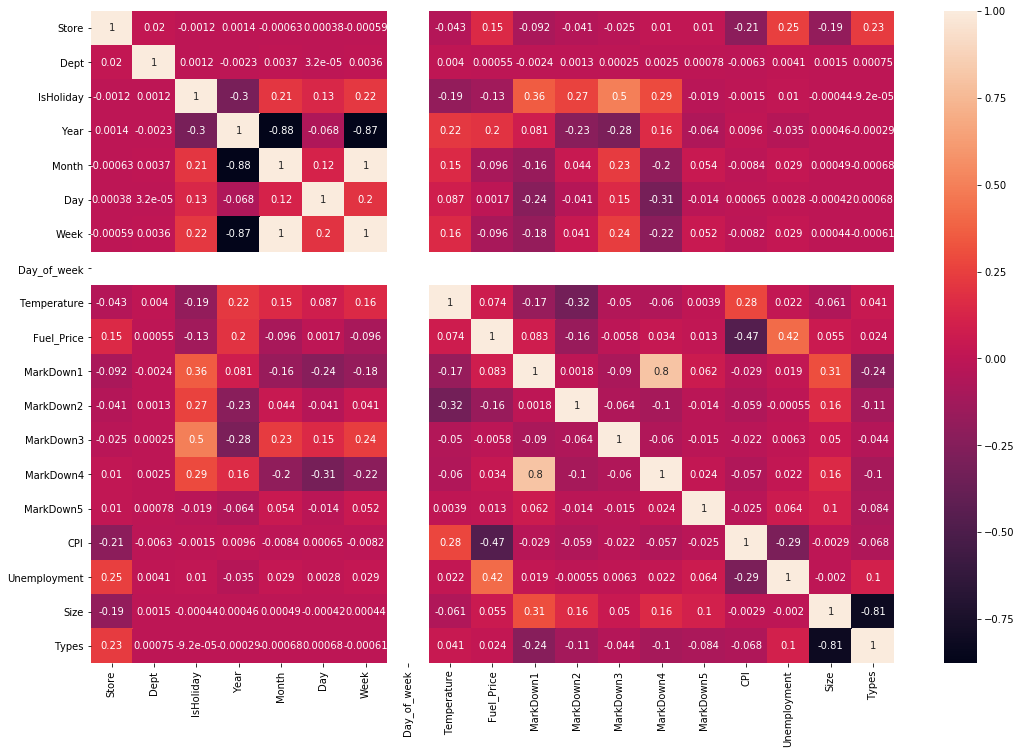

In [25]:
corr = test_final.corr()
plt.figure(figsize=(18, 12))
sb.heatmap(corr, annot=True)
plt.plot()

In [41]:
# Further feature engineering can be done for better mae

# train_final['temp_mean'] = train_final['Temperature'].mean()
# train_final['unem_mean'] = train_final['Unemployment'].mean()
# test_final['temp_mean'] = test_final['Temperature'].mean()
# test_final['unemp_mean'] = test_final['Unemployment'].mean()

# Data Cleaning

In [26]:
print(train_final.isnull().sum())
print("--" * 50)
print(test_final.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Year                 0
Month                0
Day                  0
Week                 0
Day_of_week          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
Types                0
dtype: int64
----------------------------------------------------------------------------------------------------
Store               0
Dept                0
Date                0
IsHoliday           0
Year                0
Month               0
Day                 0
Week                0
Day_of_week         0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Size   

In [27]:
train_final=train_final.fillna(0)
test_final=test_final.fillna(0)
train_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Types
0,1,1,2010-02-05,24924.50,0,2010,2,5,5,4,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1
1,1,1,2010-02-12,46039.49,1,2010,2,12,6,4,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,1
2,1,1,2010-02-19,41595.55,0,2010,2,19,7,4,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,1
3,1,1,2010-02-26,19403.54,0,2010,2,26,8,4,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,1
4,1,1,2010-03-05,21827.90,0,2010,3,5,9,4,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,1


# Note

Markdown feature creates skewness and imbalance. They should not be added to our final feature set.

In [28]:
features_drop=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_final=train_final.drop(features_drop, axis=1)
test_final=test_final.drop(features_drop, axis=1)

# Data Segregation

In [29]:
train_X=train_final.drop(['Weekly_Sales','Date'], axis=1)
train_y=train_final['Weekly_Sales'] 

test_X=test_final.drop('Date',axis=1).copy()

In [30]:
train_X.shape, train_y.shape

((421570, 14), (421570,))

In [31]:
test_X.shape

(115064, 14)

In [32]:
#spliting data into train and val sets
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=0)

In [33]:
# pickle final features
file_train_feats = open('train_final', 'wb')
file_test_feats = open('test_final', 'wb')

pickle.dump(train_final, file_train_feats)
pickle.dump(test_final, file_test_feats)

file_train_feats.close()
file_test_feats.close()

In [34]:
X_train.head()

,Store,Dept,IsHoliday,Year,Month,Day,Week,Day_of_week,Temperature,Fuel_Price,CPI,Unemployment,Size,Types
201850,21,32,0,2011,1,21,3,4,42.72,3.016,211.486469,8.028,140167,2
263688,27,58,0,2010,9,3,35,4,78.52,2.860,136.589112,7.982,204184,1
147390,15,94,0,2010,10,1,39,4,59.69,2.840,132.756800,8.067,123737,2
169866,18,19,0,2012,6,22,25,4,70.92,3.629,138.162900,8.304,120653,2
253398,26,55,0,2011,4,29,17,4,47.17,3.988,134.435733,7.818,152513,1


# Model Training and Evaluation

In [51]:
%%time
linear_regression_clf = LinearRegression()
linear_regression_clf.fit(X_train, y_train)

CPU times: user 265 ms, sys: 11.6 ms, total: 277 ms
Wall time: 169 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_val = linear_regression_clf.predict(X_test)
# y_pred = linear_regression_clf.predict(test_X)
val_accuracy = round(linear_regression_clf.score(X_test, y_test) * 100 , 2) 
accuracy = round(linear_regression_clf.score(train_X, train_y) * 100 , 2)
print ("Accuracy on validation set: {} %".format(val_accuracy))
print ("Accuracy on full train set: {} %".format(accuracy))
print("MAE on validation set: {}".format(metrics.mean_absolute_error(y_val, y_test)))

Accuracy on validation set: 8.85 %
Accuracy on full train set: 8.67 %
MAE on validation set: 14571.760198869792


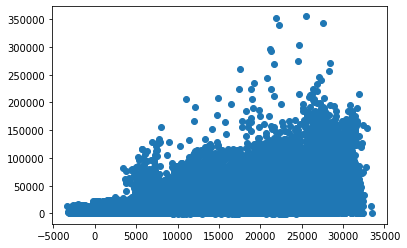

In [54]:
plt.scatter(y_val, y_test)
plt.show()

In [44]:
%%time
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=4)
knn.fit(X_train, y_train)

CPU times: user 4.42 s, sys: 75.9 ms, total: 4.49 s
Wall time: 4.28 s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=4, n_neighbors=10, p=2,
                    weights='uniform')

In [55]:
y_val = knn.predict(X_test)
# y_pred = knn.predict(test_X)
val_accuracy = round(knn.score(X_test, y_test) * 100 , 2) 
accuracy = round(knn.score(train_X, train_y) * 100 , 2)
print ("Accuracy on validation set: {} %".format(val_accuracy))
print ("Accuracy on full train set: {} %".format(accuracy))
print("MAE on validation set: {}".format(metrics.mean_absolute_error(y_val, y_test)))

Accuracy on validation set: 40.35 %
Accuracy on full train set: 48.84 %
MAE on validation set: 10903.131734694123


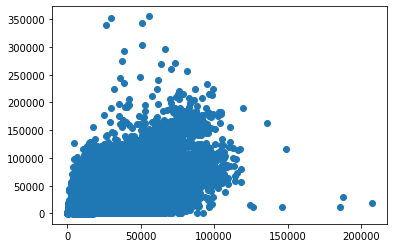

In [56]:
plt.scatter(y_val, y_test)
plt.show()

In [36]:
%%time
clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)

CPU times: user 7min 31s, sys: 2.61 s, total: 7min 33s
Wall time: 2min 8s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
''' 
Joblib is usually significantly faster on large numpy arrays because it has a special handling 
for the array buffers 
'''
dump(clf, 'model_rfr.joblib')

['model_rfr.joblib']

In [38]:
loaded_model = load('model_rfr.joblib')

y_val = loaded_model.predict(X_test)
# y_pred = loaded_model.predict(test_X)
val_accuracy = round(loaded_model.score(X_test, y_test) * 100 , 2) 
accuracy = round(loaded_model.score(train_X, train_y) * 100 , 2)
print ("Accuracy on validation set: {} %".format(val_accuracy))
print ("Accuracy on full train set: {} %".format(accuracy))
print("MAE on validation set: {}".format(metrics.mean_absolute_error(y_val, y_test)))

Accuracy on validation set: 98.01 %
Accuracy on full train set: 99.36 %
MAE on validation set: 1288.1382707901416


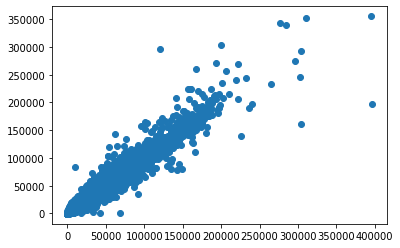

In [39]:
plt.scatter(y_val, y_test)
plt.show()

In [ ]:
# %%time
# clf2 = SVR(C=1.0, epsilon = 0.2, cache_size = 4000)
# clf2.fit(train_X, train_y)
# y_pred2 = clf.predict(test_X)
# accuracy2 = round(clf.score(train_X, train_y) * 100 , 2)
# print ("Accuracy: {} %".format(accuracy2))

In [57]:
# def svr_model(X, y):
#     gsc = GridSearchCV(
#         estimator=SVR(kernel='rbf'),
#         param_grid={
#             'C': [0.1, 1, 100],
#             'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
#             'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
#         },
#         cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#     grid_result = gsc.fit(train_X, train_y)
#     best_params = grid_result.best_params_
#     best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
#                    coef0=0.1, shrinking=True,
#                    tol=0.001, cache_size=200, verbose=False, max_iter=-1)

#     scoring = {
#                'abs_error': 'neg_mean_absolute_error',
#                'squared_error': 'neg_mean_squared_error'}

#     scores = cross_validate(best_svr, train_X, test_y, cv=7, scoring=scoring, return_train_score=True)
# return 


# Training on full data for final Submission

In [61]:
%%time
# training model on whole data for final submission
clf_final = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf_final.fit(train_X, train_y)

CPU times: user 7min 35s, sys: 2.59 s, total: 7min 38s
Wall time: 2min 3s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
dump(clf_final, 'model_final.joblib')

['model_final.joblib']

In [35]:
loaded_model = load('model_final.joblib')

In [37]:
y_pred = loaded_model.predict(train_X)
accuracy = round(loaded_model.score(train_X, train_y) * 100, 2)
print ("Accuracy on full train set: {} %".format(accuracy))
print("MAE: {}".format(metrics.mean_absolute_error(y_pred, train_y)))

Accuracy on full train set: 99.74 %
MAE: 459.1266594594019


# Submission Result (weighted MAE): 
    Private Score (70% test data):  4200
    Public Score  (30% test data):  4067
    
    ML model used: Random Forest Regressor

In [40]:
#predicting for final submission
y_pred = loaded_model.predict(test_X)

#generating submission file
submission_frame = pd.DataFrame({
        "Id": test.Store.astype(str)+'_'+test.Dept.astype(str)+'_'+test.Date.astype(str),
        "Weekly_Sales": y_pred
    })

submission_frame.to_csv('submissionf.csv', index=False)
submission_frame.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,31640.3269
1,1_1_2012-11-09,19247.3101
2,1_1_2012-11-16,18575.0141
3,1_1_2012-11-23,19137.8407
4,1_1_2012-11-30,24662.8123


# Scope of Improvement

1. We can use grid search or random search with cross validation and try to optimize 
hyperparameter space. I tried training more models and uploading on server to observe how well generalization
is achieved. But due to multiple requests on the served I couldn't upload my results and verify. Therefore I
haven't used grid search and automatic hyperparameter tuning for this exercise.

2. SVR would take a lot of time to train due to the size of dataset and the quadratic optimization complexity
of SVMs.

3. We could have used LSTM and treated this problem as a sequence prediction problem and observe the results.

4. We can also try more sophisticated feature engineering by further statistical analysis. 

5. I tried averaging temperature and few other fields to see the improvement and got 2900 wmae on private leaderboard but it is interesting to see how far different ML models could reach without feature engineering.
Aekh_submission.csv contains result of csv generated after some feature engineering.

6. The results are fine considering the fact that there's no time that has been invested in
domain research, hypothesis testing, and feature engineering.  